In [ ]:
# Source : https://github.com/Yangyangii/pytorch-practice/blob/master/CNN.ipynb

In [1]:
pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import torch
import torchvision
import torch.nn as nn

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [4]:
import numpy as np
import datetime
import os, sys

In [5]:
from matplotlib.pyplot import imshow, imsave
%matplotlib inline

In [6]:
MODEL_NAME = 'CNN'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# MODEL_NAME: 실험이나 모델 저장 시 사용할 이름.
# DEVICE: 학습/추론을 CPU 또는 GPU 중 가능한 곳으로 자동 선택

In [7]:
class HelloCNN(nn.Module):
    """
        Simple CNN Clssifier
    """
    def __init__(self, num_classes=10):
        super(HelloCNN, self).__init__()
        self.conv = nn.Sequential(
            # (N, 1, 28, 28)
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # (N, 32, 14, 14)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # (N, 64, 7, 7)
        )
        self.fc = nn.Sequential(
            nn.Linear(7*7*64, 512),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        y_ = self.conv(x) # (N, 64, 7, 7)
        y_ = y_.view(y_.size(0), -1) # (N, 64*7*7)
        y_ = self.fc(y_)
        return y_

  # ➡️ 28x28 입력 이미지 → Conv + ReLU + Pool → Conv + ReLU + Pool → Flatten → FC + Dropout → FC → 클래스별 점수 출력

In [ ]:
# 1번째 층
# 입력 채널: 1 (예: MNIST는 흑백 이미지)
# 출력 채널: 32 → 특징 맵 32개로 변환.
# 커널 크기: 3x3
# 스트라이드: 1 (한 칸씩 이동)
# 패딩: 1 (same padding → 출력 크기 유지)
### (N, 1, 28, 28) → Conv 후 (N, 32, 28, 28) → Pool 후 (N, 32, 14, 14)

# 2번째 층
# 입력 채널: 32 (이전 출력)
# 출력 채널: 64
# 커널 크기, 스트라이드, 패딩 동일.
### (N, 32, 14, 14) → Conv 후 (N, 64, 14, 14) → Pool 후 (N, 64, 7, 7)

# 분류기
# Conv block 출력: (N, 64, 7, 7) → flatten → 3136 (= 7×7×64) 차원 벡터.
# 입력: 3136, 출력: 512
# 최종 출력층: 512 차원 → num_classes (예: 10개 숫자 클래스)

In [8]:
model = HelloCNN().to(DEVICE)

In [12]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [14]:
mnist_train = datasets.MNIST(root='../data/', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='../data/', train=False, transform=transform, download=True)

In [15]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
# 1채널 × 28 픽셀 높이 × 28 픽셀 너비 형태의 이미지 하나를 담고 있습니다.

In [16]:
batch_size = 64

In [17]:
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=100, shuffle=False, drop_last=False)

In [18]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
max_epoch = 5
step = 0

In [20]:
for epoch in range(max_epoch):
    for idx, (images, labels) in enumerate(train_loader):
        # Training Discriminator
        x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
        y_hat = model(x) # (N, 10)

        loss = criterion(y_hat, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 500 == 0:
            print('Epoch: {}/{}, Step: {}, Loss: {}'.format(epoch, max_epoch, step, loss.item()))

        if step % 1000 == 0:
            model.eval()
            acc = 0.
            with torch.no_grad():
                for idx, (images, labels) in enumerate(test_loader):
                    x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
                    y_hat = model(x) # (N, 10)
                    loss = criterion(y_hat, y)
                    _, indices = torch.max(y_hat, dim=-1)
                    acc += torch.sum(indices == y).item()
            print('*'*20, 'Test', '*'*20)
            print('Step: {}, Loss: {}, Accuracy: {} %'.format(step, loss.item(), acc/len(mnist_test)*100))
            print('*'*46)
            model.train()
        step += 1

Epoch: 0/5, Step: 0, Loss: 2.3197543621063232
******************** Test ********************
Step: 0, Loss: 2.7847020626068115, Accuracy: 11.35 %
**********************************************
Epoch: 0/5, Step: 500, Loss: 0.04716844484210014
Epoch: 1/5, Step: 1000, Loss: 0.04218102991580963
******************** Test ********************
Step: 1000, Loss: 0.014723574742674828, Accuracy: 98.72 %
**********************************************
Epoch: 1/5, Step: 1500, Loss: 0.0029417183250188828
Epoch: 2/5, Step: 2000, Loss: 0.014141775667667389
******************** Test ********************
Step: 2000, Loss: 0.007991814985871315, Accuracy: 98.3 %
**********************************************
Epoch: 2/5, Step: 2500, Loss: 0.0032404360827058554
Epoch: 3/5, Step: 3000, Loss: 0.012084057554602623
******************** Test ********************
Step: 3000, Loss: 0.007723042741417885, Accuracy: 98.83 %
**********************************************
Epoch: 3/5, Step: 3500, Loss: 0.032268367707729

In [21]:
model.eval()
acc = 0.
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        x, y = images.to(DEVICE), labels.to(DEVICE) # (N, 1, 28, 28), (N, )
        y_hat = model(x) # (N, 10)
        loss = criterion(y_hat, y)
        _, indices = torch.max(y_hat, dim=-1)
        acc += torch.sum(indices == y).item()
print('*'*20, 'Test', '*'*20)
print('Step: {}, Loss: {}, Accuracy: {} %'.format(step, loss.item(), acc/len(mnist_test)*100))
print('*'*46)

******************** Test ********************
Step: 4685, Loss: 0.002350481227040291, Accuracy: 98.61 %
**********************************************


In [ ]:
# Step: 4685  -  현재 학습 스텝 수 (배치 단위로 카운트).
# Loss: 0.00235  -  마지막 테스트 배치에서 계산된 손실값.
# Accuracy: 98.61%  -  테스트셋 전체에 대해 모델이 맞춘 비율.
# 즉, 학습된 모델이 MNIST 테스트셋에서 약 98.61%의 정확도를 보임

In [22]:
idx = 7777 # 0 to 9999
img, y = mnist_test[idx]
img.shape, y

(torch.Size([1, 28, 28]), 5)

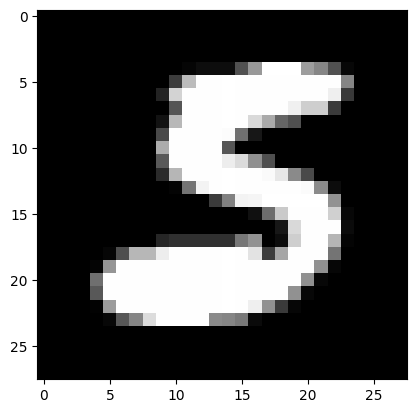

In [23]:
imshow(img[0], cmap='gray')

In [ ]:
# MNIST 테스트셋에서 인덱스 7777인 손글씨 숫자 이미지를 가져옴.
# img는 (1, 28, 28) 흑백 이미지.
# y는 해당 이미지의 정답 라벨 → 5.

In [24]:
img = img.unsqueeze(dim=0)

In [25]:
sample = img.to(DEVICE)
out = model(sample)
_, idx = out.max(dim=-1)
idx

tensor([5])